In [1]:
library('magrittr')
library('dplyr')
library('tidyr')
library('readr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
flow_data <-
    read_tsv(
        'data.tsv',
        col_types=cols(
            `Donor`=col_factor(levels=c('Donor 25', 'Donor 34', 'Donor 35', 'Donor 40', 'Donor 41')),
            `Condition`=col_factor(levels=c('No electroporation', 'Mock electroporation', 'Plasmid electroporation')),
            `Cell state`=col_factor(levels=c('Unstimulated', 'Activated')),
            .default=col_number()
        )
    )

flow_data

Donor,Cell state,Condition,Count,Live | Freq. of Parent,Live/CD3+ | Freq. of Parent,Live/CD3+/CCR7+ CD45RO+ | Freq. of Parent,Live/CD3+/CCR7+ CD45RO- | Freq. of Parent,Live/CD3+/CCR7- CD45RO+ | Freq. of Parent,Live/CD3+/CCR7- CD45RO- | Freq. of Parent
Donor 25,Activated,Mock electroporation,1230000,44.3,98.2,61.9,21.70,11.40,5.06
Donor 25,Activated,Plasmid electroporation,1020000,26.5,97.5,48.8,30.60,12.30,8.25
Donor 34,Activated,Mock electroporation,762000,45.4,94.8,73.4,18.30,4.79,3.58
Donor 34,Activated,Plasmid electroporation,534000,30.9,85.7,58.3,28.30,8.55,4.82
Donor 35,Activated,Mock electroporation,738000,53.1,95.1,78.1,12.30,6.21,3.45
Donor 35,Activated,Plasmid electroporation,530000,32.4,85.8,58.1,20.30,15.00,6.65
Donor 40,Activated,Mock electroporation,618000,47.0,97.7,74.5,12.10,11.20,2.22
Donor 40,Activated,Plasmid electroporation,479000,25.9,95.1,64.4,15.60,15.80,4.24
Donor 41,Activated,Mock electroporation,707000,49.3,98.2,79.3,13.70,5.48,1.54
Donor 41,Activated,Plasmid electroporation,567000,31.8,96.7,69.1,20.20,7.97,2.72


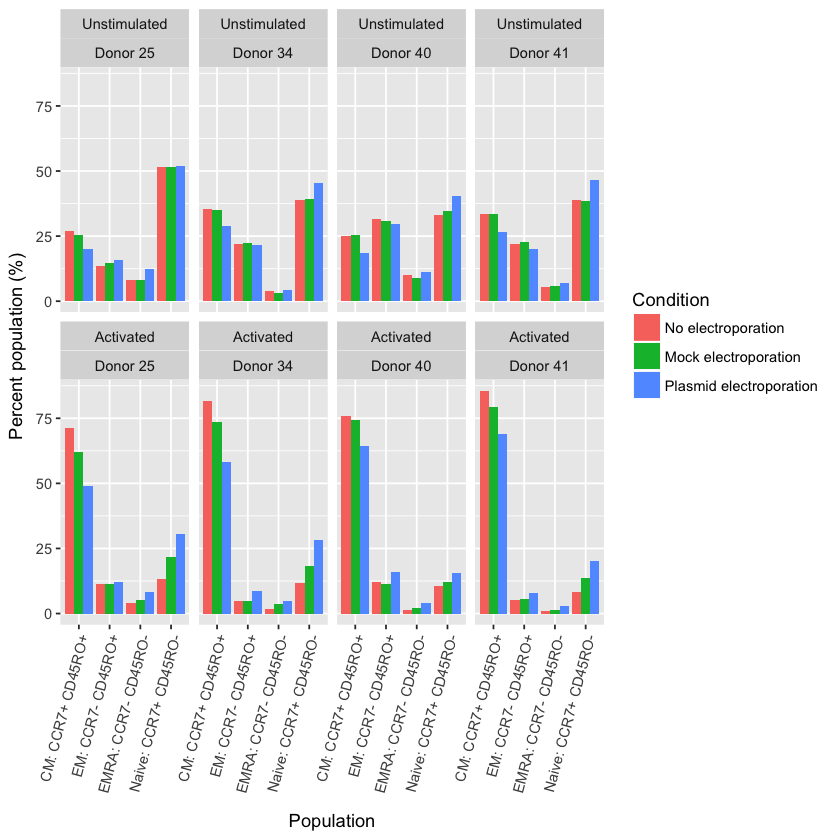

In [3]:
flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    select(
        `Donor`:`Condition`,
        `Naive: CCR7+ CD45RO-`=`Live/CD3+/CCR7+ CD45RO- | Freq. of Parent`,
        `CM: CCR7+ CD45RO+`=`Live/CD3+/CCR7+ CD45RO+ | Freq. of Parent`,
        `EM: CCR7- CD45RO+`=`Live/CD3+/CCR7- CD45RO+ | Freq. of Parent`,
        `EMRA: CCR7- CD45RO-`=`Live/CD3+/CCR7- CD45RO- | Freq. of Parent`
    ) %>%
    gather(
        key=`Population`,
        value=`Freq_of_parent`,
        `Naive: CCR7+ CD45RO-`:`EMRA: CCR7- CD45RO-`
    ) %>%
    ggplot(aes(x=`Population`, y=`Freq_of_parent`, fill=`Condition`)) +
        geom_col(position="dodge") +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        facet_wrap(~`Cell state`+`Donor`, ncol=4) +
        ylab('Percent population (%)')

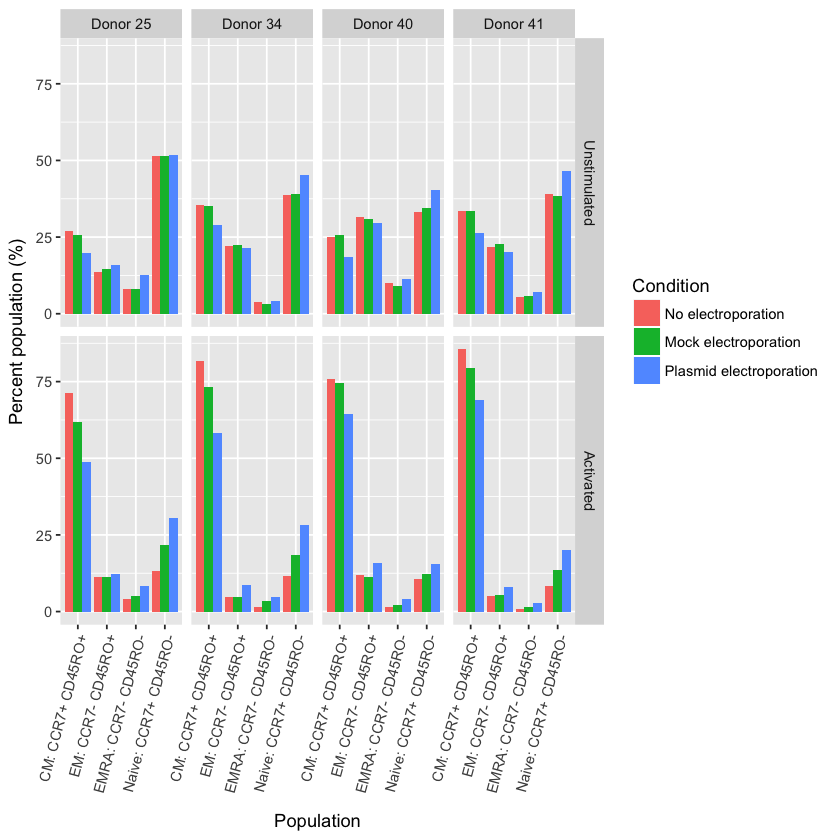

In [4]:
flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    select(
        `Donor`:`Condition`,
        `Naive: CCR7+ CD45RO-`=`Live/CD3+/CCR7+ CD45RO- | Freq. of Parent`,
        `CM: CCR7+ CD45RO+`=`Live/CD3+/CCR7+ CD45RO+ | Freq. of Parent`,
        `EM: CCR7- CD45RO+`=`Live/CD3+/CCR7- CD45RO+ | Freq. of Parent`,
        `EMRA: CCR7- CD45RO-`=`Live/CD3+/CCR7- CD45RO- | Freq. of Parent`
    ) %>%
    gather(
        key=`Population`,
        value=`Freq_of_parent`,
        `Naive: CCR7+ CD45RO-`:`EMRA: CCR7- CD45RO-`
    ) %>%
    ggplot(aes(x=`Population`, y=`Freq_of_parent`, fill=`Condition`)) +
        geom_col(position="dodge") +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        facet_grid(`Cell state`~`Donor`) +
        ylab('Percent population (%)')

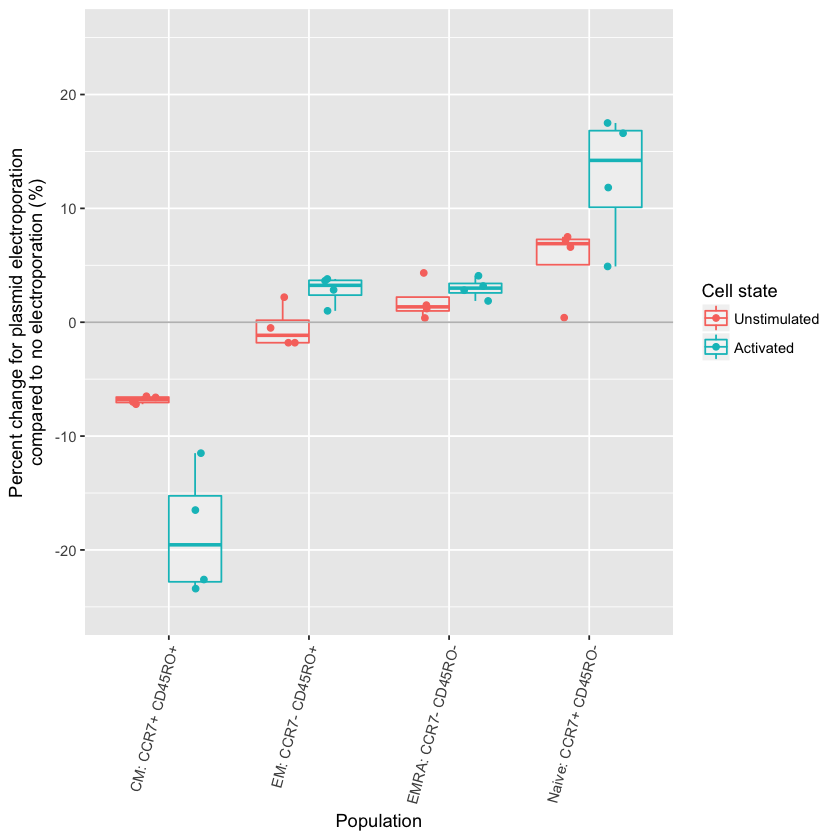

In [5]:
no_electro_val <- function(x) {
    x[1]
}


flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    select(
        `Donor`:`Condition`,
        `Naive: CCR7+ CD45RO-`=`Live/CD3+/CCR7+ CD45RO- | Freq. of Parent`,
        `CM: CCR7+ CD45RO+`=`Live/CD3+/CCR7+ CD45RO+ | Freq. of Parent`,
        `EM: CCR7- CD45RO+`=`Live/CD3+/CCR7- CD45RO+ | Freq. of Parent`,
        `EMRA: CCR7- CD45RO-`=`Live/CD3+/CCR7- CD45RO- | Freq. of Parent`
    ) %>%
    gather(
        key=`Population`,
        value=`Freq_of_parent`,
        `Naive: CCR7+ CD45RO-`:`EMRA: CCR7- CD45RO-`
    ) %>%
    arrange(`Condition`) %>%
    group_by(`Donor`, `Cell state`, `Population`) %>%
    mutate(
        `Normalized_Freq_of_parent`=`Freq_of_parent`-no_electro_val(`Freq_of_parent`)
    ) %>%
    filter(
        `Condition` == 'Plasmid electroporation'
    ) %>%
    ggplot(aes(x=`Population`, y=`Normalized_Freq_of_parent`, color=`Cell state`)) +
        geom_boxplot(alpha=.3, outlier.size=0) +
        geom_point(position=position_jitterdodge()) +
        geom_hline(yintercept=0, color="gray") +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        ylab('Percent change for plasmid electroporation\ncompared to no electroporation (%)') +
        ylim(-25, 25)

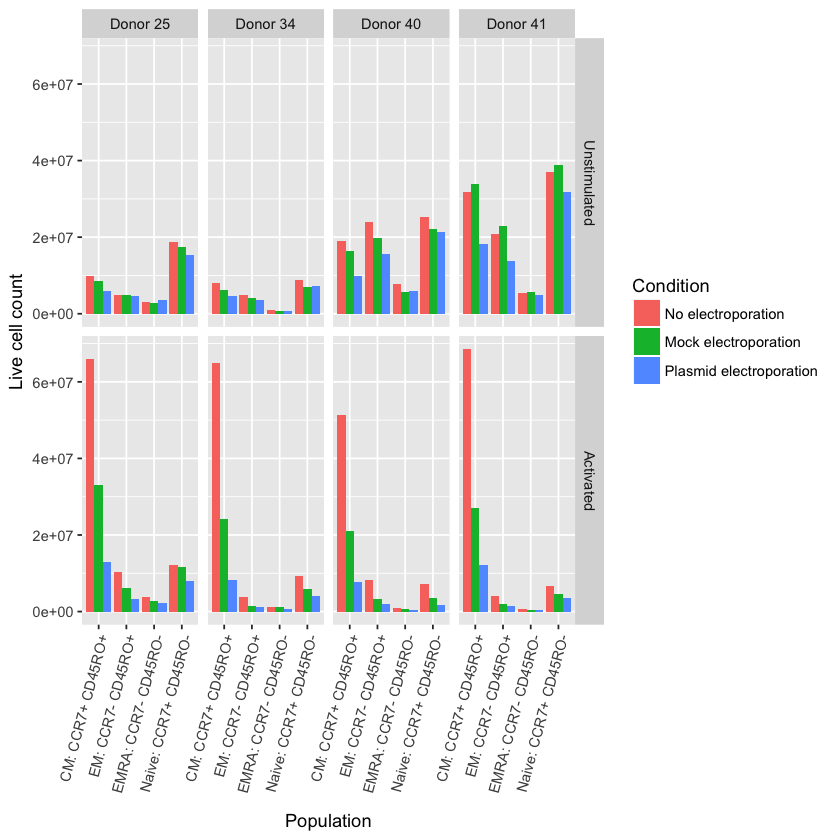

In [6]:
flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    mutate(
        `Donor`:`Condition`,
        `CD3 Count`=`Count`*(`Live | Freq. of Parent`/100.0)*(`Live/CD3+ | Freq. of Parent`/100.0),
        `Naive: CCR7+ CD45RO-`=`CD3 Count`*`Live/CD3+/CCR7+ CD45RO- | Freq. of Parent`,
        `CM: CCR7+ CD45RO+`=`CD3 Count`*`Live/CD3+/CCR7+ CD45RO+ | Freq. of Parent`,
        `EM: CCR7- CD45RO+`=`CD3 Count`*`Live/CD3+/CCR7- CD45RO+ | Freq. of Parent`,
        `EMRA: CCR7- CD45RO-`=`CD3 Count`*`Live/CD3+/CCR7- CD45RO- | Freq. of Parent`
    ) %>%
    gather(
        key=`Population`,
        value=`Freq_of_parent`,
        `Naive: CCR7+ CD45RO-`:`EMRA: CCR7- CD45RO-`
    ) %>%
    ggplot(aes(x=`Population`, y=`Freq_of_parent`, fill=`Condition`)) +
        geom_col(position="dodge") +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        facet_grid(`Cell state`~`Donor`) +
        ylab('Live cell count')

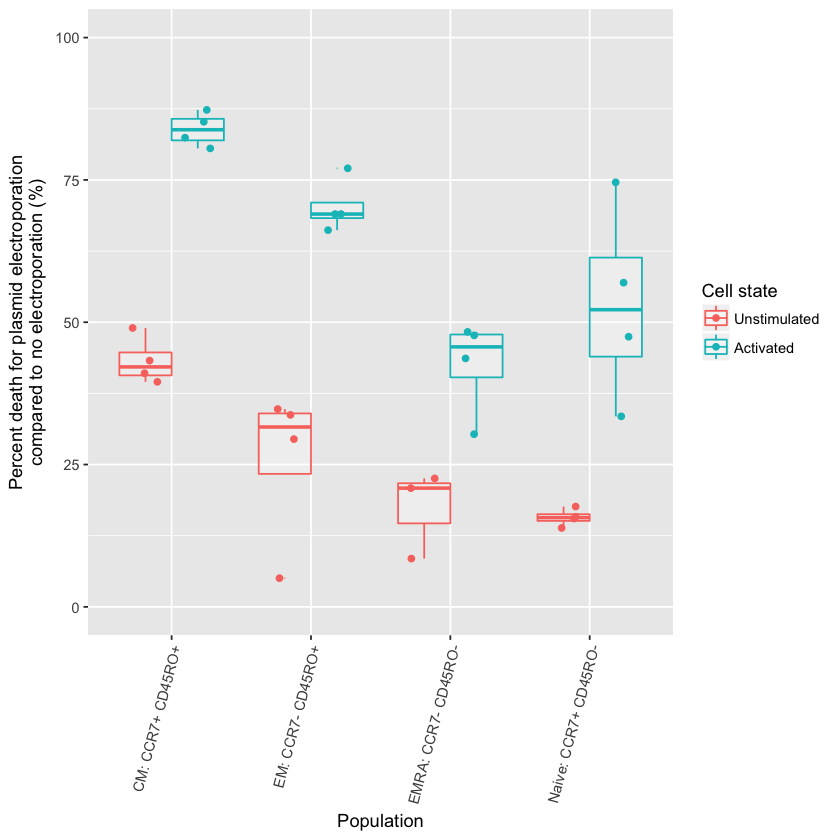

In [7]:
no_electro_val <- function(x) {
    x[1]
}

flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    mutate(
        `Donor`:`Condition`,
        `CD3 Count`=`Count`*(`Live | Freq. of Parent`/100.0)*(`Live/CD3+ | Freq. of Parent`/100.0),
        `Naive: CCR7+ CD45RO-`=`CD3 Count`*`Live/CD3+/CCR7+ CD45RO- | Freq. of Parent`,
        `CM: CCR7+ CD45RO+`=`CD3 Count`*`Live/CD3+/CCR7+ CD45RO+ | Freq. of Parent`,
        `EM: CCR7- CD45RO+`=`CD3 Count`*`Live/CD3+/CCR7- CD45RO+ | Freq. of Parent`,
        `EMRA: CCR7- CD45RO-`=`CD3 Count`*`Live/CD3+/CCR7- CD45RO- | Freq. of Parent`
    ) %>%
    gather(
        key=`Population`,
        value=`Freq_of_parent`,
        `Naive: CCR7+ CD45RO-`:`EMRA: CCR7- CD45RO-`
    ) %>%
    arrange(`Condition`) %>%
    group_by(`Donor`, `Cell state`, `Population`) %>%
    mutate(
        `Normalized_Freq_of_parent`=(1-(`Freq_of_parent`/no_electro_val(`Freq_of_parent`)))*100
    ) %>%
    filter(
        `Condition` == 'Plasmid electroporation',
        `Normalized_Freq_of_parent` > 0
    ) %>%
    ggplot(aes(x=`Population`, y=`Normalized_Freq_of_parent`, color=`Cell state`)) +
        geom_boxplot(alpha=.3, outlier.size=0) +
        geom_point(position=position_jitterdodge()) +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        ylab('Percent death for plasmid electroporation\ncompared to no electroporation (%)') +
        ylim(0, 100)

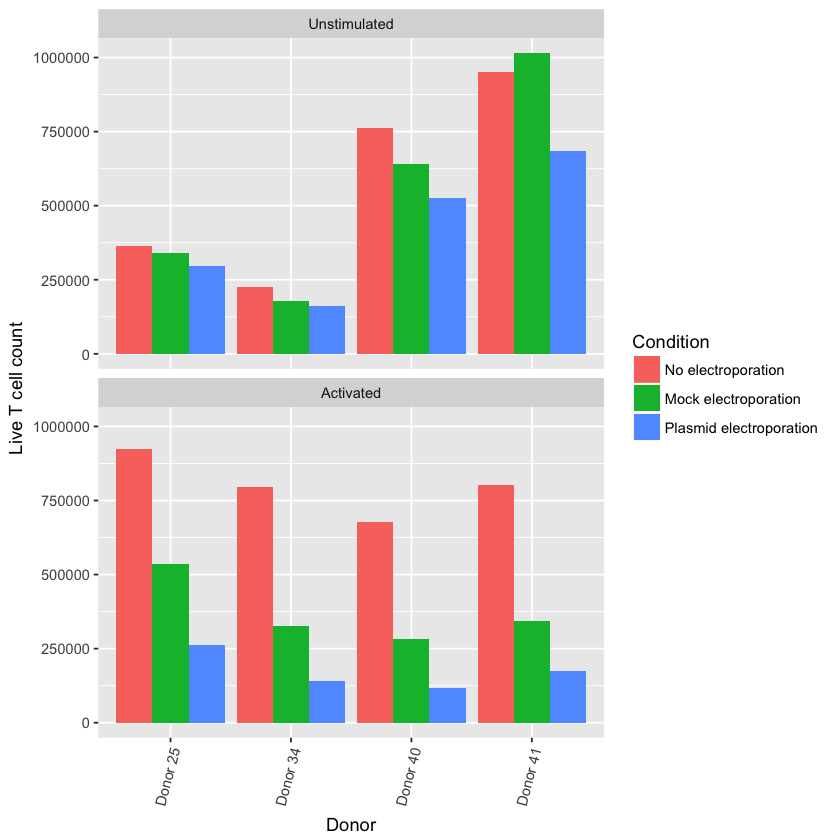

In [8]:
flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    mutate(
        `T cell count`=`Count`*(`Live | Freq. of Parent`/100.0)*(`Live/CD3+ | Freq. of Parent`/100.0)
    ) %>%
    ggplot(aes(x=`Donor`, y=`T cell count`, fill=`Condition`)) +
        geom_col(position="dodge") +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        facet_wrap(~`Cell state`, ncol=1) +
        ylab('Live T cell count')

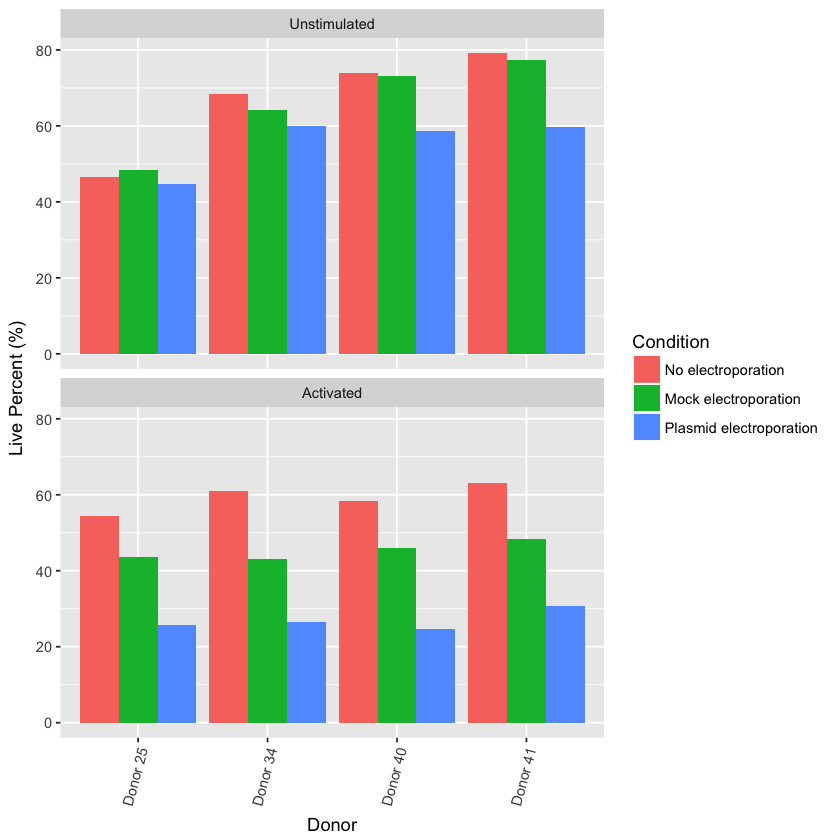

In [9]:
flow_data %>%
    filter(`Donor` != 'Donor 35') %>%
    mutate(
        `Live Percent (%)`=(`Live | Freq. of Parent`/100.0)*(`Live/CD3+ | Freq. of Parent`)
    ) %>%
    ggplot(aes(x=`Donor`, y=`Live Percent (%)`, fill=`Condition`)) +
        geom_col(position="dodge") +
        facet_wrap(~`Cell state`, ncol=1) +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        ylab('Live Percent (%)')